## Tensorflow 2.0 Dataset API using MNIST

### 1. Load Tensorflow dependencies

In [17]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential, metrics

import numpy as np

### 2. Install tensorflow-datasets and apply

In [4]:
# Follow like below:
# ~$ pip install tensorflow-datasets

In [5]:
import tensorflow_datasets as tfds

In [6]:
train_ds = tfds.load("mnist",
                               split="train",
                     as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/4 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Dl Completed...:   0%|          | 0/4 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/4 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Size...:   0%|          | 0/9 [00:00<?, ? MiB/s]

Dl Size...:   0%|          | 0/10 [00:00<?, ? MiB/s]

Dl Size...:   0%|          | 0/10 [00:00<?, ? MiB/s]

Dl Size...:   0%|          | 0/10 [00:00<?, ? MiB/s]

Extraction completed...:   0%|          | 0/1 [00:00<?, ? file/s]

Dl Size...:   0%|          | 0/10 [00:00<?, ? MiB/s]

Dl Size...:   0%|          | 0/10 [00:00<?, ? MiB/s]

Dl Size...:   0%|          | 0/10 [00:00<?, ? MiB/s]

Extraction completed...:  50%|█████     | 1/2 [00:00<00:00,  1.56 file/s]

Dl Size...:   0%|          | 0/10 [00:00<?, ? MiB/s]

Dl Size...:  10%|█         | 1/10 [00:07<01:06,  7.36s/ MiB]

Dl Size...:  20%|██        | 2/10 [00:12<00:52,  6.62s/ MiB]

Dl Size...:  30%|███       | 3/10 [00:16<00:40,  5.83s/ MiB]

Dl Size...:  30%|███       | 3/10 [00:17<00:40,  5.83s/

60000 examples [00:15, 3997.77 examples/s]
Shuffling...:   0%|          | 0/10 [00:00<?, ? shard/s]WARNING: Logging before flag parsing goes to stderr.
W0311 20:24:55.365458 4675810752 deprecation.py:323] From /anaconda3/envs/tensorflow-2.0/lib/python3.6/site-packages/tensorflow_datasets/core/file_format_adapter.py:249: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`

Reading...: 0 examples [00:00, ? examples/s]
Reading...: 6000 examples [00:00, 216802.85 examples/s]
Writing...: 100%|██████████| 6000/6000 [00:00<00:00, 186497.78 examples/s]
Reading...: 0 examples [00:00, ? examples/s]
Reading...: 6000 examples [00:00, 325505.72 examples/s]
Shuffling...:  20%|██        | 2/10 [00:00<00:00, 15.27 shard/s]xamples/s]
Reading...: 0 examples [00:00, ? examples/s]
Reading...: 6000 examples [00:00, 320236.99 examples/s]
Writing...: 100%|██████

In [10]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops._OptionsDataset

### 3. Train neural network

In [12]:
train_ds = train_ds.shuffle(1024).batch(128)

In [15]:
# Build simle neural network using keras Sequential API
network = Sequential([layers.Dense(256, activation='relu'),
                     layers.Dense(256, activation='relu'),
                     layers.Dense(256, activation='relu'),
                     layers.Dense(10)])
network.build(input_shape=(None, 28*28))
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  65792     
_________________________________________________________________
dense_2 (Dense)              multiple                  65792     
_________________________________________________________________
dense_3 (Dense)              multiple                  2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Set optimizer
optimizer = optimizers.SGD(lr=0.01)
acc_meter = metrics.Accuracy()

In [25]:
# Train like this
for (x, y) in train_ds.repeat(10):
    
    with tf.GradientTape() as tape:
        x = tf.reshape(x, (-1, 28*28))
        out = network(x)
        
        y_onehot = tf.one_hot(y, depth=10)
        
        loss = tf.square(out - y_onehot)
        loss = tf.reduce_sum(loss) / 32
        
    acc_meter.update_state(tf.argmax(out, axis=1), y)
    
    grads = tape.gradient(loss, network.trainable_variables)
    optimizer.apply_gradients(zip(grads, network.trainable_variables))

KeyboardInterrupt: 

### 4. It can be possible to load imagenet2012 dataset, directly!!

In [28]:
#train_ds = tfds.load("imagenet2012",
#                               split="train",
#                               as_supervised=True)
#train_ds = train_ds.shuffle(1024).batch(32)

#for (x, y) in train_ds.repeat(10):
#   ...

### 5. Convert simple numpy arrays

In [64]:
train_ds = tfds.load("mnist", split="train", batch_size=-1)
numpy_ds = tfds.as_numpy(train_ds)

In [65]:
imgs, lbs = numpy_ds["image"], numpy_ds["label"]

In [66]:
print('shape of image is {}'.format(np.shape(imgs)))
print('shape of label is {}'.format(np.shape(lbs)))

shape of image is (60000, 28, 28, 1)
shape of label is (60000,)


In [67]:
import matplotlib.pyplot as plt

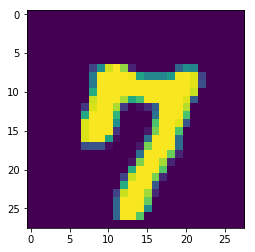

In [68]:
imgs = np.squeeze(imgs, axis=3)
plt.imshow(imgs[0])

### Now, we can train simple neural network using numpy MNIST datasets

In [81]:
# Build neural network using keras custom model
class MyModel(keras.Model):

    def __init__(self):
        super(MyModel, self).__init__()

        self.layer1 = layers.Dense(128, activation=tf.nn.relu)
        self.layer2 = layers.Dense(64, activation=tf.nn.relu)
        self.layer3 = layers.Dense(10, activation=tf.nn.sigmoid)

    def call(self, x, training=False):
        x = tf.reshape(x, [-1, 28*28])
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)

        return x

In [82]:
np.shape(imgs)

(60000, 28, 28)

In [83]:
model = MyModel()
model.build(input_shape=(None, 28*28))
model.summary()

model.compile(optimizer=optimizers.SGD(1e-1), loss='categorical_crossentropy',
                         metrics=['accuracy'])

model.fit(imgs, lbs, epochs=1, steps_per_epoch=500, verbose=1)

Model: "my_model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             multiple                  100480    
_________________________________________________________________
dense_43 (Dense)             multiple                  8256      
_________________________________________________________________
dense_44 (Dense)             multiple                  650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
500/500 [==============================] - 150s 301ms/step - loss: 102.8920 - accuracy: 0.9993
